<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/02_PyCaret_for_Classification_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Classification**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self learning resource**
1. Tutorial on Pycaret **<a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a>** 

2. Documentation on Pycaret-Classification: **<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html"> Click Here </a>**

---

### **In this tutorial we will learn:**

- Getting Data
- Setting up Environment
- Create Model
- Tune Model
- Plot Model
- Finalize Model
- Predict Model
- Save / Load Model
---



### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.3'

---
# **1. Classification: Basics**
---
### **1.1 Get the list of datasets available in pycaret (55)**




In [3]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.2 Get the "diabetes" dataset**
---

In [4]:
diabetesDataSet = get_data("diabetes")    # SN is 7
diabetesDataSet = diabetesDataSet.sample(frac=1) # Shuffle the dataset

# This is binary classification dataset. 
# The values in "Class variable" have two (binary) values.

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---
### **1.3 Download the "diabetes" dataset to local system** 
---

In [5]:
diabetesDataSet.to_csv("diabetesDataSet.csv")
from google.colab import files
#files.download('diabetesDataSet.csv')            # Uncomment this line       

---
### **1.4 "Parameter setting"  for all classification models**
##### **Train/Test division, applying data pre-processing** {Sampling, Normalization, Transformation, PCA, Handaling of Outliers, Feature Selection}
---

In [6]:
from pycaret.classification import *
s = setup(data=diabetesDataSet, target='Class variable', train_size = 0.7, data_split_shuffle = False, silent=True)


,Description,Value
0,session_id,8260
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


---
### **1.5 "Run and Compare" the model performance**
---

In [7]:
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7783,0.8292,0.5909,0.7455,0.6453,0.4898,0.5071,0.017
lr,Logistic Regression,0.7765,0.8320,0.6064,0.7231,0.6482,0.4890,0.5015,0.530
ada,Ada Boost Classifier,0.7747,0.8168,0.6181,0.7188,0.6543,0.4902,0.5015,0.108
gbc,Gradient Boosting Classifier,0.7747,0.8505,0.6228,0.7112,0.6552,0.4907,0.4995,0.126
ridge,Ridge Classifier,0.7746,0.0000,0.5798,0.7406,0.6372,0.4797,0.4967,0.014
rf,Random Forest Classifier,0.7655,0.8406,0.5959,0.6981,0.6340,0.4650,0.4750,0.513
et,Extra Trees Classifier,0.7653,0.8084,0.5696,0.7189,0.6247,0.4595,0.4733,0.463
lightgbm,Light Gradient Boosting Machine,0.7561,0.8305,0.6012,0.6818,0.6267,0.4490,0.4599,0.095
knn,K Neighbors Classifier,0.7469,0.7530,0.5430,0.6752,0.5942,0.4159,0.4258,0.120
nb,Naive Bayes,0.6965,0.7733,0.2933,0.6627,0.3976,0.2359,0.2744,0.015


---
### **1.6 "Three line of code" for model comparison for "Cancer" dataset**
---



In [8]:
from pycaret.datasets import get_data
from pycaret.classification import *

cancerDataSet = get_data("cancer")
s = setup(data = cancerDataSet, target='Class', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9560,0.9892,0.9482,0.9472,0.9465,0.9091,0.9107,0.028
ridge,Ridge Classifier,0.9519,0.0000,0.9321,0.9517,0.9400,0.8997,0.9022,0.017
rf,Random Forest Classifier,0.9498,0.9915,0.9432,0.9369,0.9385,0.8961,0.8981,0.464
lda,Linear Discriminant Analysis,0.9498,0.9819,0.9271,0.9510,0.9373,0.8954,0.8976,0.025
et,Extra Trees Classifier,0.9498,0.9908,0.9382,0.9410,0.9381,0.8959,0.8979,0.464
knn,K Neighbors Classifier,0.9457,0.9775,0.9224,0.9462,0.9321,0.8868,0.8895,0.117
nb,Naive Bayes,0.9456,0.9704,0.9321,0.9344,0.9326,0.8869,0.8878,0.019
lightgbm,Light Gradient Boosting Machine,0.9436,0.9892,0.9329,0.9324,0.9310,0.8832,0.8854,0.045
gbc,Gradient Boosting Classifier,0.9414,0.9842,0.9226,0.9361,0.9280,0.8786,0.8804,0.127
svm,SVM - Linear Kernel,0.9352,0.0000,0.9171,0.9257,0.9199,0.8654,0.8672,0.020


---
### **1.7 "Three line of code" for model comparison for "Heart Disease" dataset**
---



In [9]:
from pycaret.datasets import get_data
from pycaret.classification import *

heartDiseaseDataSet = get_data("heart_disease")
s = setup(data = heartDiseaseDataSet, target='Disease', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8240,0.8909,0.7778,0.8363,0.8019,0.6436,0.6498,0.464
et,Extra Trees Classifier,0.8231,0.8787,0.7764,0.8437,0.8040,0.6424,0.6506,0.460
lr,Logistic Regression,0.8132,0.8992,0.7653,0.8333,0.7903,0.6216,0.6325,0.146
nb,Naive Bayes,0.8082,0.8544,0.7653,0.8207,0.7855,0.6114,0.6206,0.017
ridge,Ridge Classifier,0.8076,0.0000,0.7431,0.8425,0.7811,0.6104,0.6225,0.014
lda,Linear Discriminant Analysis,0.8076,0.8969,0.7431,0.8425,0.7811,0.6104,0.6225,0.017
lightgbm,Light Gradient Boosting Machine,0.8076,0.8780,0.7750,0.8052,0.7862,0.6106,0.6162,0.028
ada,Ada Boost Classifier,0.7807,0.8393,0.7306,0.7895,0.7518,0.5558,0.5639,0.095
gbc,Gradient Boosting Classifier,0.7652,0.8574,0.7208,0.7734,0.7383,0.5261,0.5349,0.084
dt,Decision Tree Classifier,0.7181,0.7181,0.7181,0.6782,0.6952,0.4339,0.4367,0.017


---
# **2. Classification: working with user dataset**
---
### **2.1 Uploading "user file" from user system**

In [10]:
from google.colab import files
#files.upload()                     # Uncomment this line

---
### **2.2 "Read" the uploaded file**
---

In [11]:
import pandas as pd
#myDataSet = pd.read_csv('Sample5 - Brest Cancer.csv')        # Uncomment this line and replace the file name that read in above step
#myDataSet.head()                                             # Uncomment this line

---
### **2.3 "Compare" the model performance**
---

In [12]:
from pycaret.classification import *

#s = setup(data = myDataSet, target='Cancer', train_size = 0.7, data_split_shuffle = False, silent=True)               # Uncomment this line
#cm = compare_models()                                                 # Uncomment this line

---
### **2.4 "Three line of code" for model comparison for "user dataset**

##### Use it, while working on **"Anaconda/Jupyter notebook"** on local machine
---

In [13]:
from pycaret.classification import *
import pandas as pd

#myDataSet = pd.read_csv("myData.csv")                          # Uncomment this line
#s = setup(data = myDataSet, target='cancer', train_size = 0.7, data_split_shuffle = False, silent=True)      # Uncomment this line
#cm = compare_models()                                          # Uncomment this line

---
# **3. Classification: Apply "Data Preprocessing"**
---

### **3.1 Model performance using "Normalization"**

In [14]:
s = setup(data=diabetesDataSet, target='Class variable', normalize = True, normalize_method = 'zscore', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7783,0.8337,0.6120,0.7247,0.6511,0.4934,0.5068,0.026
lda,Linear Discriminant Analysis,0.7783,0.8292,0.5909,0.7455,0.6453,0.4898,0.5071,0.017
ada,Ada Boost Classifier,0.7765,0.8183,0.6234,0.7203,0.6577,0.4948,0.5061,0.113
ridge,Ridge Classifier,0.7746,0.0000,0.5798,0.7406,0.6372,0.4797,0.4967,0.015
rf,Random Forest Classifier,0.7729,0.8356,0.5962,0.7100,0.6409,0.4789,0.4877,0.504
gbc,Gradient Boosting Classifier,0.7729,0.8510,0.6281,0.7050,0.6555,0.4886,0.4969,0.128
lightgbm,Light Gradient Boosting Machine,0.7523,0.8263,0.6284,0.6683,0.6375,0.4517,0.4603,0.050
et,Extra Trees Classifier,0.7468,0.8038,0.5325,0.6818,0.5880,0.4124,0.4246,0.464
knn,K Neighbors Classifier,0.7430,0.7530,0.5325,0.6812,0.5867,0.4075,0.4204,0.120
svm,SVM - Linear Kernel,0.7209,0.0000,0.5336,0.6285,0.5553,0.3614,0.3753,0.015


---
### **3.2 Model performance using "Feature Selection"**
---

In [15]:
s = setup(data=diabetesDataSet, target='Class variable', feature_selection = True, feature_selection_method = 'classic', feature_selection_threshold = 0.8, train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

#feature_selection_method = {classic, boruta}

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7803,0.8485,0.6333,0.7181,0.6637,0.5034,0.5124,0.128
rf,Random Forest Classifier,0.7785,0.8382,0.6175,0.7130,0.6536,0.4944,0.5028,0.513
lr,Logistic Regression,0.7783,0.8314,0.6120,0.7263,0.6531,0.4946,0.5069,0.266
lda,Linear Discriminant Analysis,0.7783,0.8292,0.5909,0.7455,0.6453,0.4898,0.5071,0.020
ada,Ada Boost Classifier,0.7747,0.8168,0.6181,0.7188,0.6543,0.4902,0.5015,0.110
ridge,Ridge Classifier,0.7746,0.0000,0.5798,0.7406,0.6372,0.4797,0.4967,0.015
lightgbm,Light Gradient Boosting Machine,0.7598,0.8307,0.6117,0.6853,0.6346,0.4588,0.4691,0.049
et,Extra Trees Classifier,0.7543,0.8116,0.5541,0.6900,0.6091,0.4347,0.4439,0.463
knn,K Neighbors Classifier,0.7469,0.7530,0.5430,0.6752,0.5942,0.4159,0.4258,0.116
nb,Naive Bayes,0.6965,0.7733,0.2933,0.6627,0.3976,0.2359,0.2744,0.016


---
### **3.3 Model performance using "Outlier Removal"**
---

In [16]:
s = setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7843,0.8331,0.5958,0.7322,0.6421,0.4931,0.5088,0.257
lda,Linear Discriminant Analysis,0.7765,0.8300,0.5725,0.7324,0.6269,0.4731,0.4910,0.017
ridge,Ridge Classifier,0.7725,0.0000,0.5608,0.7271,0.6162,0.4614,0.4801,0.014
ada,Ada Boost Classifier,0.7725,0.8268,0.5843,0.7035,0.6288,0.4684,0.4792,0.109
rf,Random Forest Classifier,0.7647,0.8401,0.5670,0.6886,0.6137,0.4483,0.4585,0.506
et,Extra Trees Classifier,0.7647,0.8091,0.5549,0.6939,0.6045,0.4431,0.4563,0.462
gbc,Gradient Boosting Classifier,0.7588,0.8339,0.5722,0.6742,0.6093,0.4386,0.4484,0.122
lightgbm,Light Gradient Boosting Machine,0.7588,0.8237,0.5843,0.6695,0.6106,0.4401,0.4516,0.048
nb,Naive Bayes,0.7392,0.7796,0.4967,0.6529,0.5565,0.3789,0.3901,0.016
knn,K Neighbors Classifier,0.7353,0.7288,0.4964,0.6370,0.5537,0.3709,0.3791,0.115


---
### **3.4 Model performance using "Transformation"**
---

In [17]:
s = setup(data=diabetesDataSet, target='Class variable', transformation = True, transformation_method = 'yeo-johnson', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7803,0.8336,0.5854,0.7424,0.6467,0.4922,0.5050,0.028
ridge,Ridge Classifier,0.7784,0.0000,0.5749,0.7501,0.6397,0.4858,0.5024,0.014
lda,Linear Discriminant Analysis,0.7766,0.8273,0.5751,0.7442,0.6377,0.4822,0.4981,0.017
rf,Random Forest Classifier,0.7545,0.8101,0.5491,0.6991,0.6044,0.4324,0.4462,0.514
gbc,Gradient Boosting Classifier,0.7489,0.8130,0.5386,0.6872,0.5925,0.4179,0.4313,0.120
et,Extra Trees Classifier,0.7450,0.7837,0.5266,0.6818,0.5878,0.4090,0.4201,0.463
lightgbm,Light Gradient Boosting Machine,0.7375,0.7956,0.5594,0.6514,0.5942,0.4037,0.4114,0.051
knn,K Neighbors Classifier,0.7356,0.7583,0.4845,0.6800,0.5558,0.3777,0.3941,0.119
ada,Ada Boost Classifier,0.7302,0.7915,0.5550,0.6387,0.5857,0.3890,0.3973,0.110
svm,SVM - Linear Kernel,0.7133,0.0000,0.6076,0.5904,0.5897,0.3720,0.3790,0.016


---
### **3.5 Model performance using "PCA"**
---

In [18]:
s = setup(data=diabetesDataSet, target='Class variable', pca = True, pca_method = 'linear', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7543,0.7938,0.5108,0.7044,0.5889,0.4215,0.4340,0.022
qda,Quadratic Discriminant Analysis,0.7506,0.7873,0.5003,0.7085,0.5786,0.4113,0.4277,0.015
nb,Naive Bayes,0.7488,0.7910,0.5003,0.7017,0.5757,0.4072,0.4229,0.016
lda,Linear Discriminant Analysis,0.7487,0.7956,0.5000,0.6927,0.5780,0.4072,0.4193,0.016
ridge,Ridge Classifier,0.7431,0.0000,0.4842,0.6849,0.5636,0.3913,0.4044,0.014
ada,Ada Boost Classifier,0.7337,0.7681,0.5325,0.6492,0.5790,0.3889,0.3966,0.105
rf,Random Forest Classifier,0.7319,0.7727,0.5322,0.6426,0.5774,0.3854,0.3917,0.513
gbc,Gradient Boosting Classifier,0.7265,0.7635,0.5327,0.6342,0.5757,0.3770,0.3822,0.110
et,Extra Trees Classifier,0.7265,0.7710,0.4950,0.6384,0.5501,0.3621,0.3706,0.462
lightgbm,Light Gradient Boosting Machine,0.7188,0.7682,0.5430,0.6088,0.5658,0.3633,0.3680,0.049


---
### **3.6 Model performance using "Outlier Removal" + "Normalization"**
---

In [19]:
s = setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7784,0.8339,0.5781,0.7268,0.6306,0.4780,0.4932,0.024
lda,Linear Discriminant Analysis,0.7765,0.8300,0.5725,0.7324,0.6269,0.4731,0.4910,0.018
ada,Ada Boost Classifier,0.7745,0.8327,0.5902,0.7058,0.6329,0.4736,0.4845,0.106
ridge,Ridge Classifier,0.7725,0.0000,0.5608,0.7271,0.6162,0.4614,0.4801,0.014
rf,Random Forest Classifier,0.7706,0.8384,0.5784,0.6998,0.6232,0.4624,0.4739,0.516
et,Extra Trees Classifier,0.7686,0.8168,0.5608,0.7009,0.6121,0.4532,0.4656,0.460
lightgbm,Light Gradient Boosting Machine,0.7608,0.8260,0.5788,0.6748,0.6113,0.4425,0.4534,0.050
gbc,Gradient Boosting Classifier,0.7588,0.8373,0.5840,0.6766,0.6143,0.4427,0.4542,0.121
svm,SVM - Linear Kernel,0.7490,0.0000,0.5549,0.6663,0.5780,0.4092,0.4283,0.016
nb,Naive Bayes,0.7392,0.7796,0.4967,0.6529,0.5565,0.3789,0.3901,0.015


---
### **3.7 Model performance using "Outlier Removal" +  "Normalization" + "Transformation"**
---

In [20]:
s = setup(data=diabetesDataSet, target='Class variable', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', train_size = 0.7, data_split_shuffle = False, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7843,0.8474,0.5963,0.7180,0.6389,0.4896,0.5031,0.024
rf,Random Forest Classifier,0.7765,0.8405,0.5618,0.7179,0.6199,0.4670,0.4813,0.513
ada,Ada Boost Classifier,0.7745,0.8296,0.5853,0.6972,0.6296,0.4701,0.4790,0.107
lightgbm,Light Gradient Boosting Machine,0.7745,0.8250,0.5967,0.7031,0.6334,0.4736,0.4861,0.049
lda,Linear Discriminant Analysis,0.7725,0.8394,0.5673,0.7174,0.6152,0.4604,0.4791,0.017
et,Extra Trees Classifier,0.7725,0.8007,0.5500,0.7111,0.6097,0.4553,0.4698,0.461
ridge,Ridge Classifier,0.7686,0.0000,0.5551,0.7119,0.6063,0.4494,0.4676,0.014
gbc,Gradient Boosting Classifier,0.7667,0.8402,0.5908,0.6715,0.6212,0.4552,0.4624,0.120
knn,K Neighbors Classifier,0.7529,0.7723,0.5199,0.6940,0.5824,0.4140,0.4300,0.115
dt,Decision Tree Classifier,0.7353,0.7033,0.6088,0.6012,0.6009,0.4039,0.4070,0.017


---
### **3.8 Explore more parameters of "setup()" on pycaret**
---
- Explore setup() paramaeters in **Step 1.4**
- **<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html"> Click Here</a>** for more

---
# **4. Classification: More Operations**
---
### **4.1 Build a single model - "RandomForest"**

In [21]:
from pycaret.datasets import get_data
from pycaret.classification import *

diabetesDataSet = get_data("diabetes")
s = setup(data=diabetesDataSet, target='Class variable', train_size = 0.7, data_split_shuffle = False, silent=True)

rfModel = create_model('rf')
# Explore more parameters

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6852,0.7098,0.5263,0.5556,0.5405,0.3014,0.3016
1,0.7963,0.8519,0.5789,0.7857,0.6667,0.5248,0.5375
2,0.8519,0.8556,0.6842,0.8667,0.7647,0.6588,0.6686
3,0.7593,0.7774,0.5263,0.7143,0.6061,0.4384,0.4490
4,0.6852,0.7624,0.5789,0.5500,0.5641,0.3180,0.3182
5,0.6667,0.7090,0.4211,0.5333,0.4706,0.2322,0.2357
6,0.7222,0.7962,0.4211,0.6667,0.5161,0.3350,0.3524
7,0.8302,0.8793,0.6842,0.8125,0.7429,0.6175,0.6226
8,0.7925,0.8166,0.6316,0.7500,0.6857,0.5325,0.5369
9,0.7925,0.8508,0.5000,0.8182,0.6207,0.4890,0.5171


---
### **4.2 Other available classification models**
---
-	'ada' -	Ada Boost Classifier
-	'dt' -	Decision Tree Classifier
-	'et' -	Extra Trees Classifier
-	'gbc' -	Gradient Boosting Classifier
-	'knn' -	K Neighbors Classifier
-	'lightgbm' -	Light Gradient Boosting Machine
-	'lda' -	Linear Discriminant Analysis
-	'lr' -	Logistic Regression
-	'nb' -	Naive Bayes
-	'qda' -	Quadratic Discriminant Analysis
-	'rf' -	Random Forest Classifier
-	'ridge' -	Ridge Classifier
-	'svm' -	SVM - Linear Kernel

---
### **4.3 Explore more parameters of "create_model()" on pycaret**
---

**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.create_model"> Click Here</a>** 

---
### **4.4 Make prediction on the "new unseen dataset"**
---
#### **Get the "new unseen dataset"**



In [22]:
# Select top 10 rows from diabetes dataset
newDataSet = get_data("diabetes").iloc[:10]

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **Make prediction on "new unseen dataset"**

In [23]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.81
1,1,85,66,29,0,26.6,0.351,31,0,0,0.96
2,8,183,64,0,0,23.3,0.672,32,1,1,0.75
3,1,89,66,23,94,28.1,0.167,21,0,0,1.00
4,0,137,40,35,168,43.1,2.288,33,1,1,0.97
5,5,116,74,0,0,25.6,0.201,30,0,0,0.93
6,3,78,50,32,88,31.0,0.248,26,1,1,0.63
7,10,115,0,0,0,35.3,0.134,29,0,0,0.80
8,2,197,70,45,543,30.5,0.158,53,1,1,0.91
9,8,125,96,0,0,0.0,0.232,54,1,1,0.71


---
### **4.5 "Save" the prediction results to csv** 
---

In [24]:
newPredictions.to_csv("NewPredictions.csv")
print("Result saved in NewPredictions.csv")

Result saved in NewPredictions.csv


---
### **4.6 Download the "result file" to user local system** 
---

In [25]:
from google.colab import files
#files.download('NewPredictions.csv')      # Uncomment this line

---
### **4.7 "Save" the trained model** 
---

In [26]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Successfully Saved


---
### **4.8 Download the "trained model file" to user local system** 
---

In [27]:
from google.colab import files
#files.download('rfModelFile.pkl')           # Uncomment this line

---
### **4.9  "Upload the trained model" --> "Load the model"  --> "Make the prediction" on "new unseen dataset"** 
---
### **4.9.1 Upload the  "Trained Model"**


In [28]:
from google.colab import files
#files.upload()                    # Uncomment this line

---
### **4.9.2 Load the "Model"**
---

In [29]:
#rfModel = load_model('rfModelFile (1)')        # Uncomment this line

---
### **4.9.3 Make the prediction on "new unseen dataset"**
---

In [30]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.81
1,1,85,66,29,0,26.6,0.351,31,0,0,0.96
2,8,183,64,0,0,23.3,0.672,32,1,1,0.75
3,1,89,66,23,94,28.1,0.167,21,0,0,1.00
4,0,137,40,35,168,43.1,2.288,33,1,1,0.97
5,5,116,74,0,0,25.6,0.201,30,0,0,0.93
6,3,78,50,32,88,31.0,0.248,26,1,1,0.63
7,10,115,0,0,0,35.3,0.134,29,0,0,0.80
8,2,197,70,45,543,30.5,0.158,53,1,1,0.91
9,8,125,96,0,0,0.0,0.232,54,1,1,0.71


---
# **5. Plot the trained model**
---
**Following parameters can be plot for a trained model**
*   Area Under the Curve         - 'auc'
*   Discrimination Threshold     - 'threshold'
*   Precision Recall Curve       - 'pr'
*   Confusion Matrix             - 'confusion_matrix'
*   Class Prediction Error       - 'error'
*   Classification Report        - 'class_report'
*   Decision Boundary            - 'boundary'
*   Recursive Feat. Selection    - 'rfe'
*   Learning Curve               - 'learning'
*   Manifold Learning            - 'manifold'
*   Calibration Curve            - 'calibration'
*   Validation Curve             - 'vc'
*   Dimension Learning           - 'dimension'
*   Feature Importance           - 'feature'
*   Model Hyperparameter         - 'parameter'

---
### **5.1 Create RandomForest model or any other model**
---

In [31]:
rfModel = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6852,0.7098,0.5263,0.5556,0.5405,0.3014,0.3016
1,0.7963,0.8519,0.5789,0.7857,0.6667,0.5248,0.5375
2,0.8519,0.8556,0.6842,0.8667,0.7647,0.6588,0.6686
3,0.7593,0.7774,0.5263,0.7143,0.6061,0.4384,0.4490
4,0.6852,0.7624,0.5789,0.5500,0.5641,0.3180,0.3182
5,0.6667,0.7090,0.4211,0.5333,0.4706,0.2322,0.2357
6,0.7222,0.7962,0.4211,0.6667,0.5161,0.3350,0.3524
7,0.8302,0.8793,0.6842,0.8125,0.7429,0.6175,0.6226
8,0.7925,0.8166,0.6316,0.7500,0.6857,0.5325,0.5369
9,0.7925,0.8508,0.5000,0.8182,0.6207,0.4890,0.5171


---
### **5.2 Create "Confusion Matrix"**
---

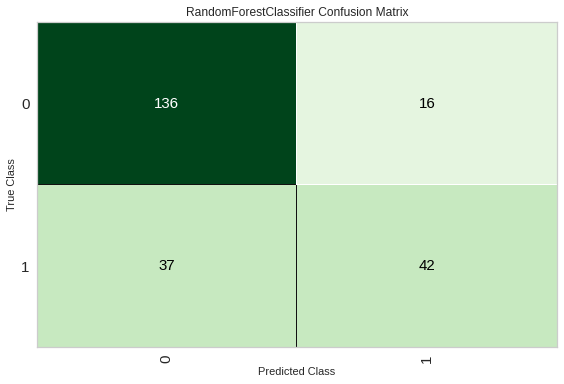

In [32]:
plot_model(rfModel, plot='confusion_matrix')

---
### **5.3 Plot the "learning curve"**
---

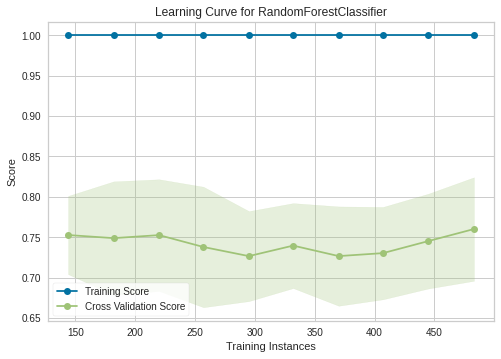

In [33]:
plot_model(rfModel, plot='learning')

---
### **5.4 Plot the "AUC Curve" (Area Under the Curve)**
---

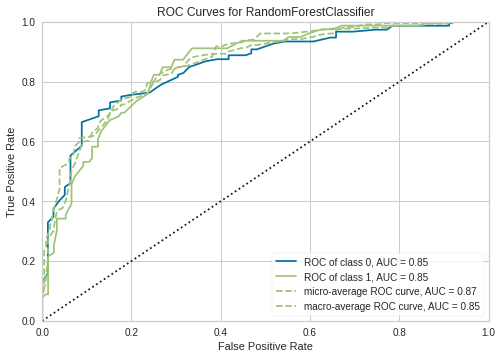

In [34]:
plot_model(rfModel, plot='auc')

---
### **5.5 Plot the "Decision Boundary"**
---

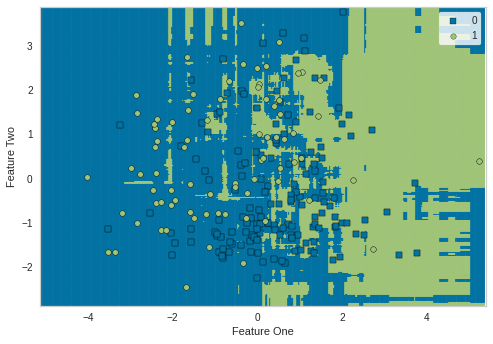

In [35]:
plot_model(rfModel, plot='boundary')

---
### **5.6 Get the model "parameters"**
---

In [36]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


---
### **5.7 Explore the more parameters of "plot_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.plot_model"> Click Here </a>**

---
# **6. Feature Importance**
---
### **6.1 Feature Importance using "Random Forest"**


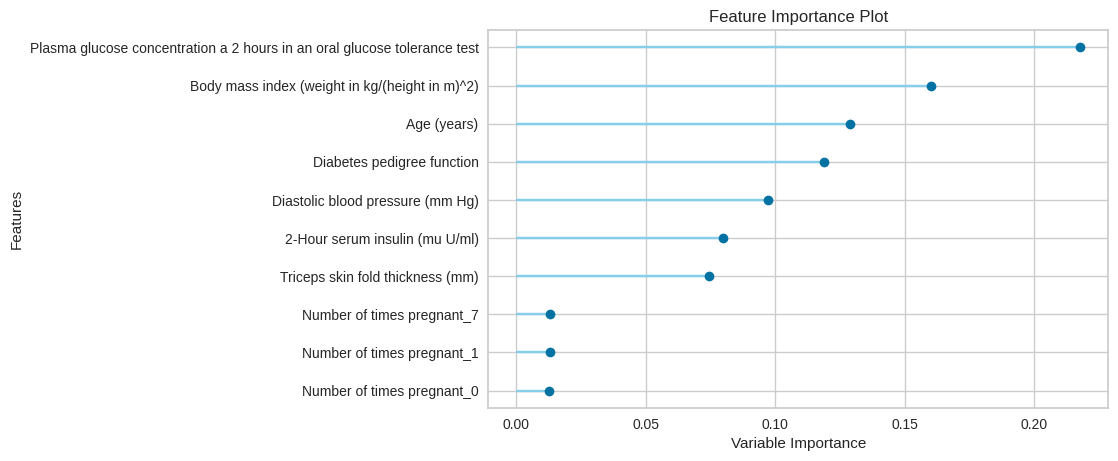

In [37]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
### **6.2 Feature Importance using "Extra Trees Regressor"**
---

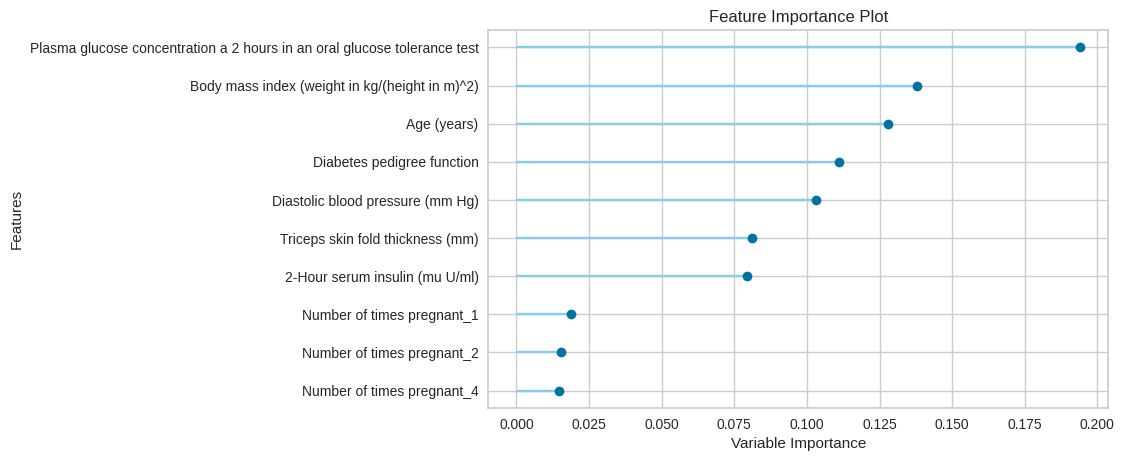

In [38]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
### **6.3 Feature Importance using "Decision Tree"**
---

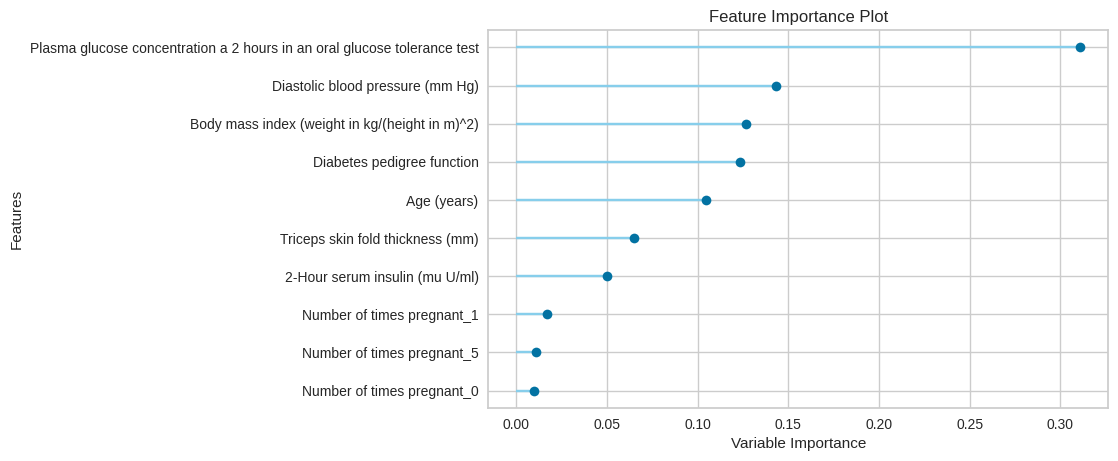

In [39]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
# **7. Tune/Optimize the model performance**
---
### **7.1 Train "Decision Tree" with default parameters**


In [40]:
dtModel = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6296,0.5940,0.4737,0.4737,0.4737,0.1880,0.1880
1,0.7222,0.6534,0.4211,0.6667,0.5161,0.3350,0.3524
2,0.7963,0.7827,0.7368,0.7000,0.7179,0.5587,0.5591
3,0.6667,0.6466,0.5789,0.5238,0.5500,0.2863,0.2872
4,0.6667,0.6466,0.5789,0.5238,0.5500,0.2863,0.2872
5,0.5556,0.5008,0.3158,0.3529,0.3333,0.0015,0.0015
6,0.6111,0.5436,0.3158,0.4286,0.3636,0.0928,0.0950
7,0.6792,0.6455,0.5263,0.5556,0.5405,0.2944,0.2947
8,0.6792,0.6455,0.5263,0.5556,0.5405,0.2944,0.2947
9,0.7736,0.7476,0.6667,0.6667,0.6667,0.4952,0.4952


#### **Get the "parameters" of Decision Tree**

In [41]:
plot_model(dtModel, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1
min_samples_split,2


---
### **7.2 Tune "Decision Tree" model**
---

In [42]:
dtModelTuned = tune_model(dtModel, n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7519,0.7368,0.5833,0.6512,0.4255,0.4336
1,0.7963,0.7835,0.5263,0.8333,0.6452,0.5123,0.5389
2,0.7963,0.8632,0.5789,0.7857,0.6667,0.5248,0.5375
3,0.6852,0.7383,0.6842,0.5417,0.6047,0.3489,0.3555
4,0.7407,0.7436,0.4211,0.7273,0.5333,0.3710,0.3976
5,0.7037,0.7150,0.4737,0.6000,0.5294,0.3175,0.3223
6,0.7963,0.7977,0.5263,0.8333,0.6452,0.5123,0.5389
7,0.7736,0.8916,0.5263,0.7692,0.6250,0.4709,0.4883
8,0.7736,0.8142,0.8421,0.6400,0.7273,0.5398,0.5547
9,0.7358,0.7397,0.3333,0.7500,0.4615,0.3193,0.3654


#### **Get the "tuned parameters" of Decision Tree**

In [43]:
plot_model(dtModelTuned, plot='parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,entropy
max_depth,6
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.005
min_impurity_split,None
min_samples_leaf,4
min_samples_split,2


---
### **7.3 Explore more parameters of "tune_model()" on pycaret**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.tune_model"> Click Here </a>**

---
# **8. AutoML - Advanced Machine Learning**
---

- Select n Best Models:
  - Ensemble, Stacking, Begging, Blending
  - Auto tune the best n models

**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.automl">Click Here</a>**





---
# **9. Deploy the model on AWS / Azure**
---
**<a href="https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.deploy_model">Click Here</a>**
